# Description of the Project

This project aims to get crypto currency price predictions for the end of the 2023 based on news media sentiments 2021 - 2023. The idea is that I will collect hourly news for two major cryptos bitcoin, ethereum, and blockchain, altocoins, defi, and nfts. We will use this data with the data we collected for hourly crypto price data, and train a machine learning model to learn patterns. We will use this model to forecast the data for last two months of 2023, and test it against actual crypto fluctuations for that time.

# Data Collection
First, we will collect crypto price data, reddit data, and traditional news data each from their own APIs.

In [ ]:
#!/usr/bin/env python
import requests
import pandas as pd
from datetime import datetime, timedelta
import time

def fetch_crypto_data_hourly(crypto_id, start_date, end_date):
    """
    Fetch hourly historical price, volume, and market cap data for a cryptocurrency from CoinCap API.

    :param crypto_id: Cryptocurrency ID (e.g., 'bitcoin', 'ethereum').
    :param start_date: Start date (datetime object).
    :param end_date: End date (datetime object).
    :return: List of historical hourly data for the cryptocurrency.
    """
    url = f"https://api.coincap.io/v2/assets/{crypto_id}/history"
    all_data = []

    # Fetch data in intervals to avoid API limitations
    while start_date < end_date:
        interval_end = min(start_date + timedelta(days=30), end_date)  # Fetch 1 month at a time
        params = {
            "interval": "h1",  # Hourly data
            "start": int(start_date.timestamp() * 1000),  # Start timestamp in ms
            "end": int(interval_end.timestamp() * 1000),  # End timestamp in ms
        }

        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            data = response.json().get("data", [])
            # Add the data to the collection
            all_data.extend(data)
        except requests.exceptions.RequestException as ex:
            print(f"Error fetching data for {crypto_id}: {ex}")
            break

        start_date = interval_end + timedelta(hours=1)  # Move to the next interval
        time.sleep(1)  # Sleep to respect API rate limits

    return all_data

def save_to_csv(data, filename):
    """
    Save data to a CSV file.

    :param data: List of historical price data.
    :param filename: Output CSV filename.
    """
    if not data:
        print("No data to save.")
        return

    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data)
    # Ensure timestamps are in human-readable format
    df["time"] = pd.to_datetime(df["time"], unit="ms")
    # Rename columns for clarity
    df.rename(columns={"priceUsd": "price_usd", "volumeUsd24Hr": "volume_usd", "marketCapUsd": "market_cap"}, inplace=True)
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

def run():
    """
    Main function to fetch and save hourly historical data for specified cryptocurrencies.
    """
    # Cryptocurrencies of interest
    cryptos = {
        "bitcoin": "bitcoin",
        "ethereum": "ethereum",
        "dogecoin": "dogecoin",
        "shiba-inu": "shiba-inu",
        "uniswap": "uniswap",
        "aave": "aave",
        "compound": "compound",
        "flow": "flow",
        "decentraland": "decentraland",
        "the-sandbox": "the-sandbox",
    }

    # Start and end dates
    start_date = datetime(2021, 10, 12)  # Start date (YYYY, MM, DD)
    end_date = datetime(2023, 12, 19)    # End date (YYYY, MM, DD)

    for crypto_name, crypto_id in cryptos.items():
        print(f"Fetching hourly data for {crypto_name}...")
        data = fetch_crypto_data_hourly(crypto_id, start_date, end_date)

        # Add a column identifying the cryptocurrency
        for entry in data:
            entry["crypto"] = crypto_name

        # Save data to a CSV file
        filename = f"{crypto_name}_hourly_2021-10-12_to_2023-12-19.csv"
        save_to_csv(data, filename)

    print("Hourly data collection completed.")

if __name__ == "__main__":
    run()


Fetching hourly data for bitcoin...
Data saved to bitcoin_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for ethereum...
Data saved to ethereum_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for dogecoin...
Data saved to dogecoin_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for shiba-inu...
Data saved to shiba-inu_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for uniswap...
Data saved to uniswap_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for aave...
Data saved to aave_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for compound...
Data saved to compound_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for flow...
Data saved to flow_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for decentraland...
Data saved to decentraland_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for the-sandbox...
Data saved to the-sandbox_hourly_2021-10-12_to_2023-12-19.csv
Hourly data collection completed.


# Merge Altcoins into one, Nfts into one, and Defi into one.

In [ ]:
import pandas as pd
from datetime import datetime

# Define category mappings
altcoin_coins = ["shiba-inu", "dogecoin"]
nft_coins = ["flow", "decentraland", "the-sandbox"]
defi_coins = ["uniswap", "aave", "compound"]
standalone_coins = ["bitcoin", "ethereum"]

# Function to load and process price data for each category
def load_price_data(coin_list, category_label):
    combined_df = pd.DataFrame()
    for coin in coin_list:
        file_path = f"{coin}_hourly_2021-10-12_to_2023-12-19.csv"
        df = pd.read_csv(file_path)
        df["time"] = pd.to_datetime(df["time"])
        df["category"] = category_label
        df["coin"] = coin
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    return combined_df

# Process each category
altcoin_data = load_price_data(altcoin_coins, "altcoin")
nft_data = load_price_data(nft_coins, "nft")
defi_data = load_price_data(defi_coins, "defi")
bitcoin_data = load_price_data(["bitcoin"], "bitcoin")
ethereum_data = load_price_data(["ethereum"], "ethereum")

# Combine all categories into a single dataset
all_price_data = pd.concat([altcoin_data, nft_data, defi_data, bitcoin_data, ethereum_data], ignore_index=True)

# Save combined price data to a file
all_price_data.to_csv("combined_price_data.csv", index=False)
print("Combined price data saved to 'combined_price_data.csv'")

FileNotFoundError: [Errno 2] No such file or directory: 'shiba-inu_hourly_2021-10-12_to_2023-12-19.csv'

## Merge News and Price data

* Preprocess news data (sentiment components get extracted into a separated columns using eval()).
* Round news data to its nearest hour.

In [ ]:
import pandas as pd
import ast  # For safely evaluating the sentiment dictionary string

# Load the datasets
news_data = pd.read_csv("cryptonews.csv")
price_data = pd.read_csv("combined_price_data.csv")

# Ensure proper datetime format
news_data['date'] = pd.to_datetime(news_data['date'], format='mixed', errors='coerce')  # Handle mixed formats
price_data['time'] = pd.to_datetime(price_data['time'])

# Round news timestamps to the nearest hour
news_data['rounded_time'] = news_data['date'].dt.round('h')

# Parse the sentiment dictionary into separate columns
def parse_sentiment(sentiment_str):
    try:
        sentiment_dict = ast.literal_eval(sentiment_str)  # Safely evaluate the string
        return pd.Series({
            "sentiment_class": sentiment_dict.get("class"),
            "sentiment_polarity": sentiment_dict.get("polarity"),
            "sentiment_subjectivity": sentiment_dict.get("subjectivity")
        })
    except:
        return pd.Series({
            "sentiment_class": None,
            "sentiment_polarity": None,
            "sentiment_subjectivity": None
        })

# Apply parsing function
sentiment_data = news_data['sentiment'].apply(parse_sentiment)
news_data = pd.concat([news_data, sentiment_data], axis=1)

# Select additional fields to retain in the merged dataset
news_data = news_data[['rounded_time', 'sentiment_class', 'sentiment_polarity',
                       'sentiment_subjectivity', 'text', 'title']]

# Merge the news data with price data
merged_data = pd.merge(price_data, news_data, left_on='time', right_on='rounded_time', how='left')

# Save the merged dataset
merged_data.to_csv("merged_price_news_data.csv", index=False)
print("Merged data saved to 'merged_price_news_data.csv'")


Merged data saved to 'merged_price_news_data.csv'


# Handle Missing Values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the merged data
merged_data = pd.read_csv("merged_price_news_data.csv")

# Ensure datetime format
merged_data['time'] = pd.to_datetime(merged_data['time'])

# Step 1: Handle Missing Values
# Fill missing sentiment data with neutral defaults
merged_data['sentiment_class'] = merged_data['sentiment_class'].fillna('neutral')
merged_data['sentiment_polarity'] = merged_data['sentiment_polarity'].fillna(0.0)
merged_data['sentiment_subjectivity'] = merged_data['sentiment_subjectivity'].fillna(0.5)

# Interpolate missing price data
merged_data['price_usd'] = merged_data['price_usd'].interpolate(method='linear')

# Step 2: Create Lagged Features
for lag in range(1, 4):  # Create 1, 2, 3-hour lags
    merged_data[f'price_usd_lag{lag}'] = merged_data['price_usd'].shift(lag)
    merged_data[f'sentiment_polarity_lag{lag}'] = merged_data['sentiment_polarity'].shift(lag)
    merged_data[f'sentiment_subjectivity_lag{lag}'] = merged_data['sentiment_subjectivity'].shift(lag)

# Step 3: Calculate Moving Averages and Volatility
merged_data['price_usd_ma7'] = merged_data['price_usd'].rolling(window=7).mean()
merged_data['price_usd_std7'] = merged_data['price_usd'].rolling(window=7).std()

# Step 4: Encode Sentiment Class
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
merged_data['sentiment_class_encoded'] = merged_data['sentiment_class'].map(sentiment_mapping)

# Step 5: Drop Rows with NaN (due to lagging and rolling operations)
merged_data.dropna(inplace=True)

# Step 6: Split Data
# Training: 2021-10-12 to 2022-12-31
# Validation: 2023-01-01 to 2023-09-30
# Testing: 2023-10-01 to 2023-12-19
train_data = merged_data[merged_data['time'] < '2023-01-01']
val_data = merged_data[(merged_data['time'] >= '2023-01-01') & (merged_data['time'] < '2023-10-01')]
test_data = merged_data[merged_data['time'] >= '2023-10-01']

# Step 7: Normalize Features Separately
# Define columns to scale (excluding the original price)
scaled_columns = ['price_usd_ma7', 'price_usd_std7', 'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3']

# Function to scale a dataset
def scale_data(data, scaler=None, fit=True):
    if fit:
        scaler = MinMaxScaler()
        data[scaled_columns] = scaler.fit_transform(data[scaled_columns])
    else:
        data[scaled_columns] = scaler.transform(data[scaled_columns])
    return data, scaler

# Scale training data
train_data, train_scaler = scale_data(train_data, fit=True)

# Scale validation and test data using training scaler
val_data, _ = scale_data(val_data, scaler=train_scaler, fit=False)
test_data, _ = scale_data(test_data, scaler=train_scaler, fit=False)

# Preserve Original Prices
# Ensure the original `price_usd` column is intact for all splits
train_data['original_price_usd'] = train_data['price_usd']
val_data['original_price_usd'] = val_data['price_usd']
test_data['original_price_usd'] = test_data['price_usd']

# Save datasets
train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print("Feature engineering and splitting completed. Datasets saved for training, validation, and testing.")

<ipython-input-21-5d3a121c54f5>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaled_columns] = scaler.fit_transform(data[scaled_columns])
<ipython-input-21-5d3a121c54f5>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaled_columns] = scaler.transform(data[scaled_columns])
<ipython-input-21-5d3a121c54f5>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Feature engineering and splitting completed. Datasets saved for training, validation, and testing.


# Predictions

# Visualize Predictions

In [3]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv("train_data.csv")
val_data = pd.read_csv("val_data.csv")
test_data = pd.read_csv("test_data.csv")

# Ensure datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
val_data['time'] = pd.to_datetime(val_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Step 1: Check Original Prices for All Categories
print("\n=== Original Data Statistics ===")
for file_name, data in [("Train", train_data), ("Validation", val_data), ("Test", test_data)]:
    print(f"\n{file_name} Data:")
    for category in data['category'].unique():
        category_data = data[data['category'] == category]
        print(f"  {category} - Price Statistics:")
        print(category_data['price_usd'].describe())

# Step 2: Verify Aggregation/Filtering for a Specific Category
categories = test_data['category'].unique()

for category in categories:
    print(f"\nProcessing category: {category}")

    # Filter data for this category
    train_category = train_data[train_data['category'] == category]
    val_category = val_data[val_data['category'] == category]
    test_category = test_data[test_data['category'] == category]

    print(f"\nData Overview for {category}:")
    print(f"  Train: {train_category['price_usd'].describe()}")
    print(f"  Validation: {val_category['price_usd'].describe()}")
    print(f"  Test: {test_category['price_usd'].describe()}")

    # Step 3: Verify Scaling and Inverse Transform for `price_usd`
    from sklearn.preprocessing import MinMaxScaler

    target_scaler = MinMaxScaler()

    # Fit scaler on training target
    train_target_scaled = target_scaler.fit_transform(train_category[['price_usd']])
    test_target_scaled = target_scaler.transform(test_category[['price_usd']])

    # Inverse Transform
    test_target_inverse = target_scaler.inverse_transform(test_target_scaled)

    print(f"\nScaling Check for {category}:")
    print(f"  Original Test Prices - Min: {test_category['price_usd'].min()}, Max: {test_category['price_usd'].max()}")
    print(f"  Scaled Test Prices - Min: {test_target_scaled.min()}, Max: {test_target_scaled.max()}")
    print(f"  Inverse Transformed Test Prices - Min: {test_target_inverse.min()}, Max: {test_target_inverse.max()}")



=== Original Data Statistics ===

Train Data:
  altcoin - Price Statistics:
count    2.903800e+04
mean     7.226261e-07
std      8.244361e-07
min      1.748751e-11
25%      8.671980e-11
50%      3.650365e-07
75%      1.238626e-06
max      4.287200e-06
Name: price_usd, dtype: float64
  nft - Price Statistics:
count    43551.000000
mean         0.000032
std          0.000028
min          0.000004
25%          0.000012
50%          0.000022
75%          0.000041
max          0.000272
Name: price_usd, dtype: float64
  defi - Price Statistics:
count    43555.000000
mean         0.000975
std          0.000881
min          0.000050
25%          0.000134
50%          0.000824
75%          0.001473
max          0.005546
Name: price_usd, dtype: float64
  bitcoin - Price Statistics:
count    14519.000000
mean         0.416324
std          0.158212
min          0.228348
25%          0.284871
50%          0.337148
75%          0.569551
max          1.000000
Name: price_usd, dtype: float64
  ethere


Processing category: altcoin
Original Prices (Before Scaling) for altcoin:
count    8198.000000
mean        0.037333
std         0.038355
min         0.000007
25%         0.000008
50%         0.028792
75%         0.074259
max         0.104770
Name: price_usd, dtype: float64
Scaling Range for altcoin Prices:
Original Min: 7.2706030102e-06, Max: 0.2942089733869868
Scaled Min: 0.0, Max: 1.0
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0114 - val_loss: 9.9681e-06
Epoch 2/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.1766e-05 - val_loss: 5.1694e-06
Epoch 3/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4527e-05 - val_loss: 3.2808e-06
Epoch 4/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2363e-05 - val_loss: 4.6672e-06
Epoch 5/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1410e-05 - val_loss: 4.2178e-06
Epoch 6/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0683e-05 - val_loss: 2.2302e-06
Epoch 7/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2056e-05 - val_loss: 2.2814e-06
Epoch 8/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2368e-05 - val_loss: 1.7878e-06
Epoch 9/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.8034e-06 - val_loss: 4.0720e-06
Epoch 10/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8.5059e-06 - val_loss: 2.2856e-06
Epoch 11/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2206e-05 - 

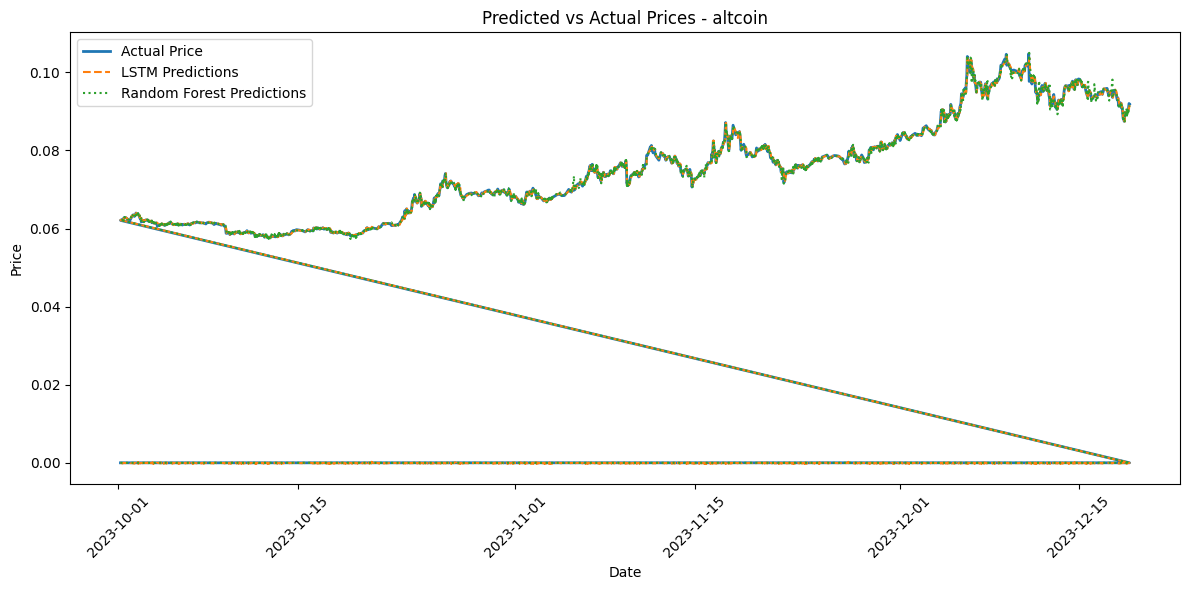

altcoin - LSTM RMSE: 0.00028952302059009205, Random Forest RMSE: 0.00036401655503440477

Processing category: nft
Original Prices (Before Scaling) for nft:
count    12297.000000
mean         0.455612
std          0.134139
min          0.272978
25%          0.358011
50%          0.431549
75%          0.512065
max          0.866258
Name: price_usd, dtype: float64
Scaling Range for nft Prices:
Original Min: 0.2862039899672092, Max: 18.652034598203024
Scaled Min: 0.0, Max: 1.0
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0030 - val_loss: 2.0736e-06
Epoch 2/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.5051e-06 - val_loss: 1.7814e-06
Epoch 3/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.3902e-06 - val_loss: 1.4728e-06
Epoch 4/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5768e-06 - val_loss: 3.4925e-06
Epoch 5/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.2916e-06 - val_loss: 4.2680e-07
Epoch 6/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.1833e-06 - val_loss: 1.2745e-06
Epoch 7/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.2457e-06 - val_loss: 1.9705e-06
Epoch 8/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.2556e-06 - val_loss: 1.9105e-06
Epoch 9/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.9750e-06 - val_loss: 3.3387e-06
Epoch 10/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.8931e-06 - val_loss: 2.6453e-07
Epoch 11/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

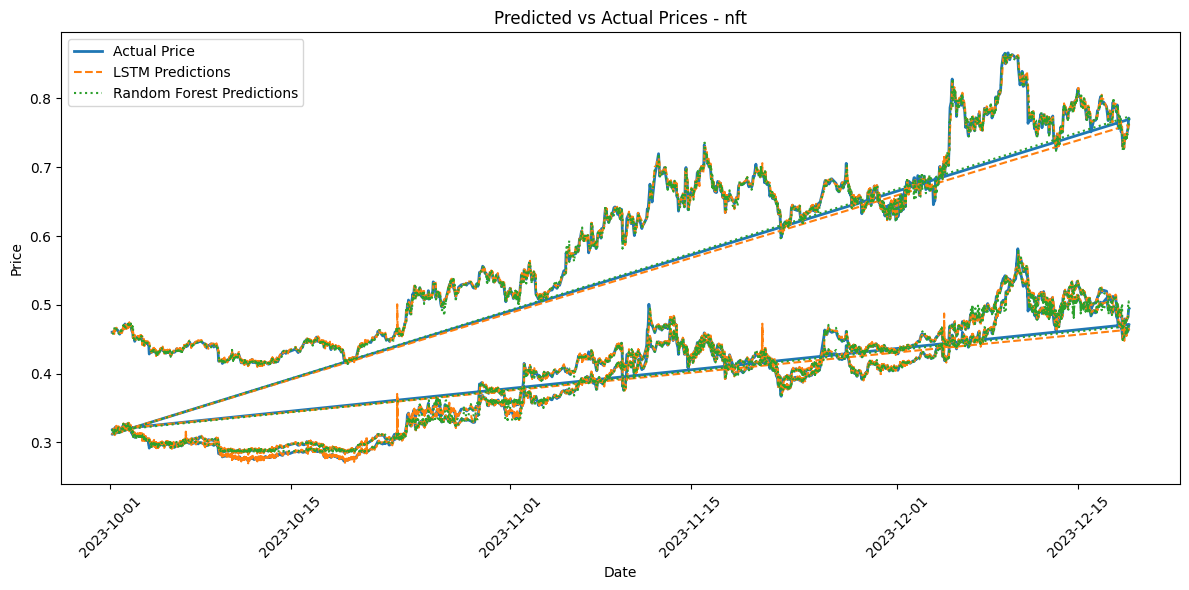

nft - LSTM RMSE: 0.0039343857204174855, Random Forest RMSE: 0.00441043210079023

Processing category: defi
Original Prices (Before Scaling) for defi:
count    12297.000000
mean        46.555458
std         34.187336
min          3.849914
25%          6.057228
50%         50.174104
75%         70.143845
max        116.423950
Name: price_usd, dtype: float64
Scaling Range for defi Prices:
Original Min: 3.4148724712077696, Max: 380.55993106370136
Scaled Min: 0.0, Max: 1.0
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0052 - val_loss: 2.4091e-06
Epoch 2/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2035e-05 - val_loss: 1.6717e-06
Epoch 3/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 9.4972e-06 - val_loss: 1.2266e-06
Epoch 4/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.4631e-06 - val_loss: 1.3189e-06
Epoch 5/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.4185e-06 - val_loss: 1.7074e-06
Epoch 6/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8.6906e-06 - val_loss: 9.8412e-07
Epoch 7/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.3937e-06 - val_loss: 1.0344e-05
Epoch 8/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.4907e-06 - val_loss: 2.1569e-06
Epoch 9/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 7.7936e-06 - val_loss: 8.9690e-07
Epoch 10/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 8.3380e-06 - val_loss: 1.1167e-06
Epoch 11/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/ste

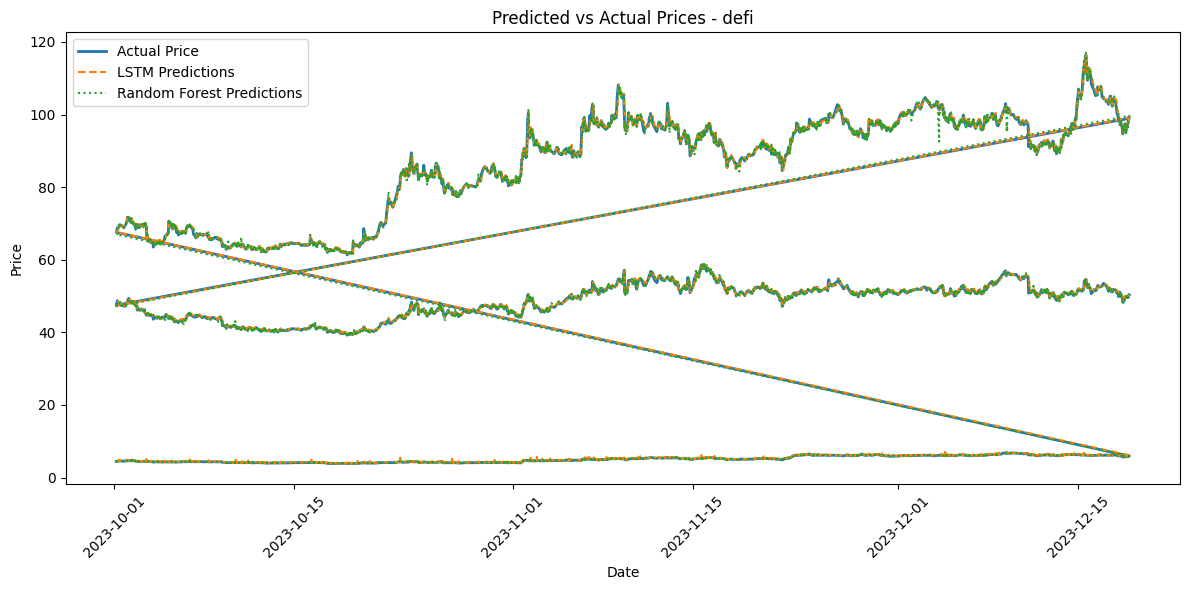

defi - LSTM RMSE: 0.3972867659595972, Random Forest RMSE: 0.4161300475150105

Processing category: bitcoin
Original Prices (Before Scaling) for bitcoin:
count     4099.000000
mean     35145.842937
std       5169.605117
min      26654.444856
25%      29600.295369
50%      35901.850451
75%      37828.443271
max      44480.376052
Name: price_usd, dtype: float64
Scaling Range for bitcoin Prices:
Original Min: 15670.07674767183, Max: 68623.5597632578
Scaled Min: 0.0, Max: 1.0000000000000002
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0290 - val_loss: 6.4806e-05
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7650e-05 - val_loss: 1.7069e-05
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7713e-05 - val_loss: 9.5415e-06
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.7482e-05 - val_loss: 8.5151e-06
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9847e-05 - val_loss: 1.3641e-05
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.6690e-05 - val_loss: 8.1682e-06
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5227e-05 - val_loss: 9.0642e-06
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5683e-05 - val_loss: 8.7895e-06
Epoch 9/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5810e-05 - val_loss: 6.3920e-06
Epoch 10/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5106e-05 - val_loss: 5.7699e-06
Epoch 11/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4630e-05 - 

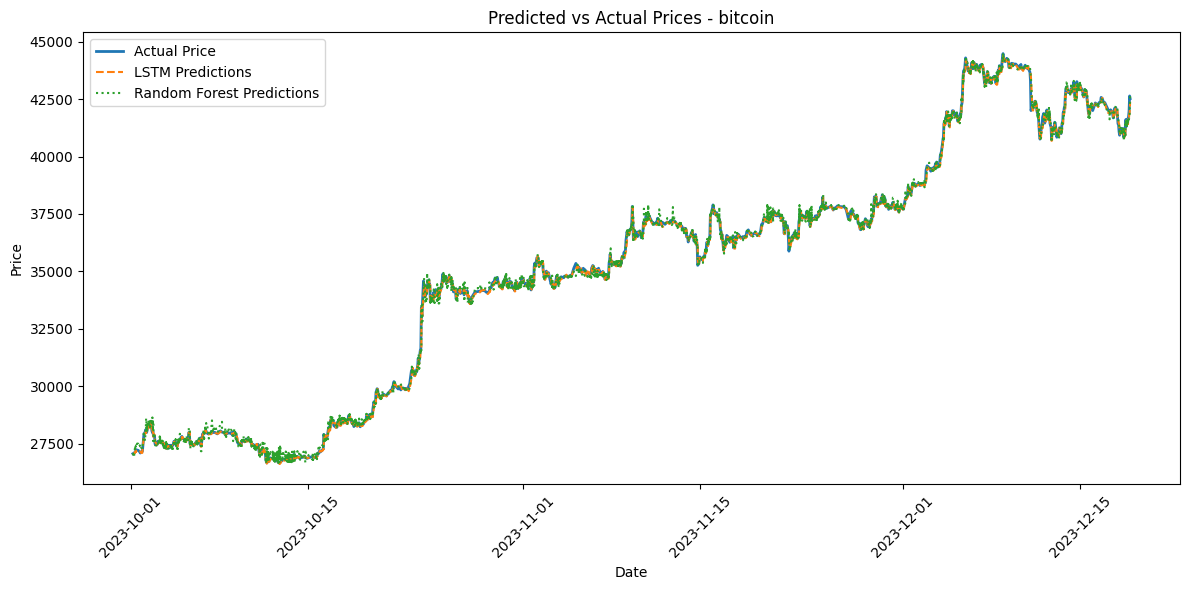

bitcoin - LSTM RMSE: 108.6045370298675, Random Forest RMSE: 160.59308827001215

Processing category: ethereum
Original Prices (Before Scaling) for ethereum:
count    4099.000000
mean     1915.583066
std       239.371873
min      1531.658309
25%      1678.084565
50%      1920.589139
75%      2088.573330
max      2383.630304
Name: price_usd, dtype: float64
Scaling Range for ethereum Prices:
Original Min: 926.4961794346096, Max: 4856.5768331933
Scaled Min: 0.0, Max: 0.9999999999999999
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0297 - val_loss: 1.9296e-05
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.1074e-05 - val_loss: 8.7000e-06
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.3538e-05 - val_loss: 7.2519e-06
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.7696e-05 - val_loss: 6.2462e-06
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4219e-05 - val_loss: 6.2805e-06
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7741e-05 - val_loss: 6.9408e-06
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6263e-05 - val_loss: 4.9008e-06
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3744e-05 - val_loss: 3.5163e-06
Epoch 9/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0941e-05 - val_loss: 3.7919e-06
Epoch 10/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0299e-05 - val_loss: 5.3769e-06
Epoch 11/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2086e-05 - 

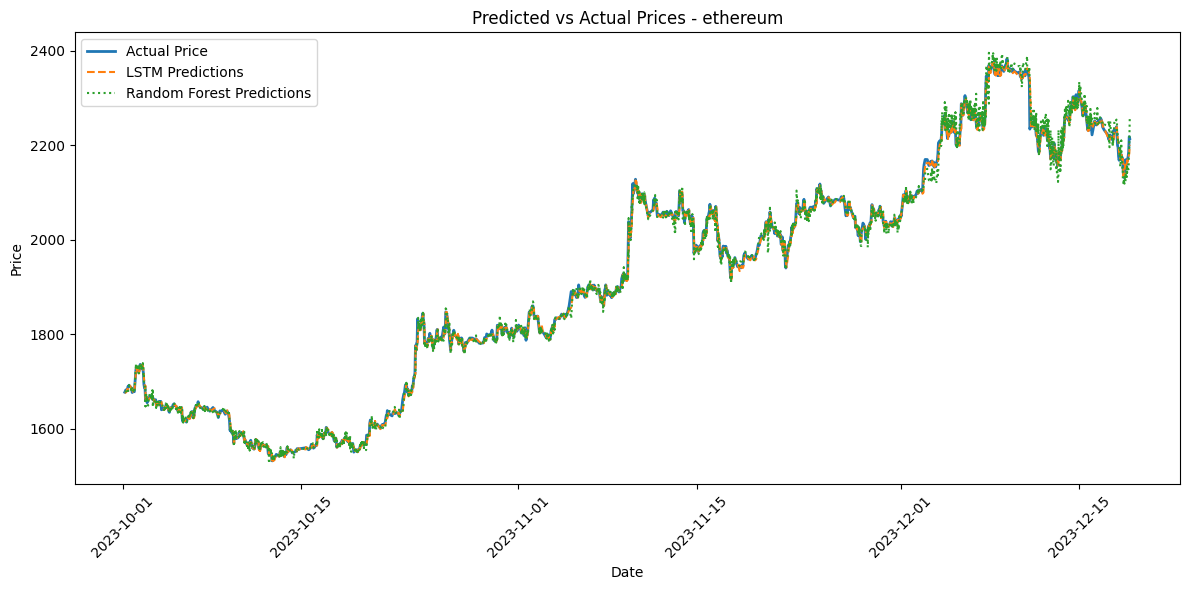

ethereum - LSTM RMSE: 7.005203025661731, Random Forest RMSE: 10.713547274328603


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

# Load the datasets
train_data = pd.read_csv("train_data.csv")
val_data = pd.read_csv("val_data.csv")
test_data = pd.read_csv("test_data.csv")

# Ensure datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
val_data['time'] = pd.to_datetime(val_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Get unique categories for analysis
categories = test_data['category'].unique()

results = {}

# Corrected Scaling and Visualization with Debugging
for category in categories:
    print(f"\nProcessing category: {category}")

    # Filter data for this category
    train_category = train_data[train_data['category'] == category]
    val_category = val_data[val_data['category'] == category]
    test_category = test_data[test_data['category'] == category]

    # Define feature and target columns
    feature_columns = ['sentiment_polarity', 'sentiment_subjectivity',
                       'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3']
    target_column = 'price_usd'

    # Debug: Check original prices
    print(f"Original Prices (Before Scaling) for {category}:")
    print(test_category[target_column].describe())

    # Separate scalers for features and target
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Scale features and target separately
    train_features = feature_scaler.fit_transform(train_category[feature_columns])
    val_features = feature_scaler.transform(val_category[feature_columns])
    test_features = feature_scaler.transform(test_category[feature_columns])

    train_target = target_scaler.fit_transform(train_category[[target_column]])
    val_target = target_scaler.transform(val_category[[target_column]])
    test_target = target_scaler.transform(test_category[[target_column]])

    # Debug: Check scaling range
    print(f"Scaling Range for {category} Prices:")
    print(f"Original Min: {train_category[target_column].min()}, Max: {train_category[target_column].max()}")
    print(f"Scaled Min: {train_target.min()}, Max: {train_target.max()}")

    # Reshape features for LSTM input
    train_features_lstm = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
    val_features_lstm = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
    test_features_lstm = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])

    # Train LSTM Model
    lstm_model = Sequential([
        LSTM(50, activation='relu', input_shape=(1, len(feature_columns))),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    lstm_model.fit(
        train_features_lstm, train_target,
        validation_data=(val_features_lstm, val_target),
        epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1
    )

    lstm_predictions = lstm_model.predict(test_features_lstm).flatten()

    # Train Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(train_features, train_target.flatten())

    rf_predictions = rf_model.predict(test_features)

    # Inverse Transform Predictions and Target
    actual_prices = target_scaler.inverse_transform(test_target).flatten()
    lstm_prices = target_scaler.inverse_transform(lstm_predictions.reshape(-1, 1)).flatten()
    rf_prices = target_scaler.inverse_transform(rf_predictions.reshape(-1, 1)).flatten()

    # Debug: Check inverse transformation
    print(f"Inverse Transformed Prices (After Scaling) for {category}:")
    print(f"Actual Prices Min: {actual_prices.min()}, Max: {actual_prices.max()}")
    print(f"LSTM Predictions Min: {lstm_prices.min()}, Max: {lstm_prices.max()}")
    print(f"Random Forest Predictions Min: {rf_prices.min()}, Max: {rf_prices.max()}")

    # Plot Results
    plt.figure(figsize=(12, 6))
    plt.plot(test_category['time'], actual_prices, label='Actual Price', linewidth=2)
    plt.plot(test_category['time'], lstm_prices, label='LSTM Predictions', linestyle='dashed')
    plt.plot(test_category['time'], rf_prices, label='Random Forest Predictions', linestyle='dotted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs Actual Prices - {category}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate RMSE
    lstm_rmse = np.sqrt(mean_squared_error(actual_prices, lstm_prices))
    rf_rmse = np.sqrt(mean_squared_error(actual_prices, rf_prices))
    print(f"{category} - LSTM RMSE: {lstm_rmse}, Random Forest RMSE: {rf_rmse}")


In [ ]:
!pip install transformers pandas tqdm

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Step 1: Load Datasets
news_file = "cryptonews.csv"
price_file = "combined_price_data.csv"

news_data = pd.read_csv(news_file)
price_data = pd.read_csv(price_file)

# Ensure proper datetime format
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
price_data['time'] = pd.to_datetime(price_data['time'])

# Step 2: Initialize Pretrained Sentiment Analysis Pipeline
print("Loading sentiment analysis pipeline...")
sentiment_pipeline = pipeline("sentiment-analysis")

# Step 3: Batch Processing for Large Datasets
def batch_sentiment_analysis(data, text_column, batch_size=32):
    results = []
    for i in tqdm(range(0, len(data), batch_size), desc="Processing Sentiment Batches"):
        batch = data.iloc[i:i + batch_size]
        try:
            # Truncate text to the max input length of the model (512 tokens)
            sentiments = sentiment_pipeline(list(batch[text_column].apply(lambda x: str(x)[:512])))
            results.extend(sentiments)
        except Exception as e:
            print(f"Error processing batch {i}-{i+batch_size}: {e}")
            results.extend([{"label": None, "score": None}] * len(batch))
    return results

# Step 4: Apply Sentiment Analysis
print("Running sentiment analysis...")
sentiments = batch_sentiment_analysis(news_data, text_column='text')

# Add sentiment results to the dataset
news_data['sentiment_label'] = [s['label'] for s in sentiments]
news_data['sentiment_score'] = [s['score'] for s in sentiments]

# Step 5: Map Sentiment Labels to Numerical Values
label_mapping = {"NEGATIVE": -1, "NEUTRAL": 0, "POSITIVE": 1}
news_data['sentiment_value'] = news_data['sentiment_label'].map(label_mapping)

# Step 6: Save Intermediate Results
intermediate_output_file = "news_data_with_sentiments_intermediate.csv"
news_data.to_csv(intermediate_output_file, index=False)
print(f"Intermediate sentiment analysis results saved to {intermediate_output_file}")

# Step 7: Merge Sentiment Data with Price Data
# Round news timestamps to the nearest hour to match price data
news_data['rounded_time'] = news_data['date'].dt.round('H')

# Merge datasets
merged_data = pd.merge(price_data, news_data, left_on='time', right_on='rounded_time', how='left')

# Fill missing sentiment data with neutral defaults
merged_data['sentiment_label'].fillna("NEUTRAL", inplace=True)
merged_data['sentiment_score'].fillna(0.5, inplace=True)
merged_data['sentiment_value'].fillna(0, inplace=True)

# Step 8: Save the Merged Dataset
merged_output_file = "merged_price_news_sentiments.csv"
merged_data.to_csv(merged_output_file, index=False)
print(f"Merged dataset saved to {merged_output_file}")

# Step 9: Verification
print("\nSample of the Merged Dataset:")
print(merged_data[['time', 'price_usd', 'sentiment_label', 'sentiment_score', 'sentiment_value']].head())




No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Loading sentiment analysis pipeline...


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Running sentiment analysis...


Processing Sentiment Batches: 100%|██████████| 970/970 [43:35<00:00,  2.70s/it]


Intermediate sentiment analysis results saved to news_data_with_sentiments_intermediate.csv


<ipython-input-6-e9f292616b02>:53: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  news_data['rounded_time'] = news_data['date'].dt.round('H')
<ipython-input-6-e9f292616b02>:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['sentiment_label'].fillna("NEUTRAL", inplace=True)
<ipython-input-6-e9f292616b02>:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in 

Merged dataset saved to merged_price_news_sentiments.csv

Sample of the Merged Dataset:
                 time  price_usd sentiment_label  sentiment_score  \
0 2021-10-12 00:00:00   0.000031         NEUTRAL              0.5   
1 2021-10-12 01:00:00   0.000030         NEUTRAL              0.5   
2 2021-10-12 02:00:00   0.000030         NEUTRAL              0.5   
3 2021-10-12 03:00:00   0.000031         NEUTRAL              0.5   
4 2021-10-12 04:00:00   0.000031         NEUTRAL              0.5   

   sentiment_value  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  


## TEST THE DATASET AGAIN AFTER LLM SENTIMENT ANALYSIS

<ipython-input-10-7d43e9506c5f>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['sentiment_value'].fillna(0, inplace=True)
<ipython-input-10-7d43e9506c5f>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Epoch 1/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3.2814 - val_loss: 0.0073
Epoch 2/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0208 - val_loss: 0.0030
Epoch 3/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0071 - val_loss: 8.4325e-04
Epoch 4/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0020 - val_loss: 3.3742e-04
Epoch 5/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0012 - val_loss: 5.4441e-04
Epoch 6/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.8745e-04 - val_loss: 1.1979e-04
Epoch 7/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.1980e-04 - val_loss: 1.3474e-04
Epoch 8/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.8662e-04 - val_loss: 1.5587e-04
Epoch 9/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.3848e-04 - val_loss: 1.5415e-04
Epoch 10/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.6948e-04 - val_loss: 8.1940e-05
Epoch 11/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.41

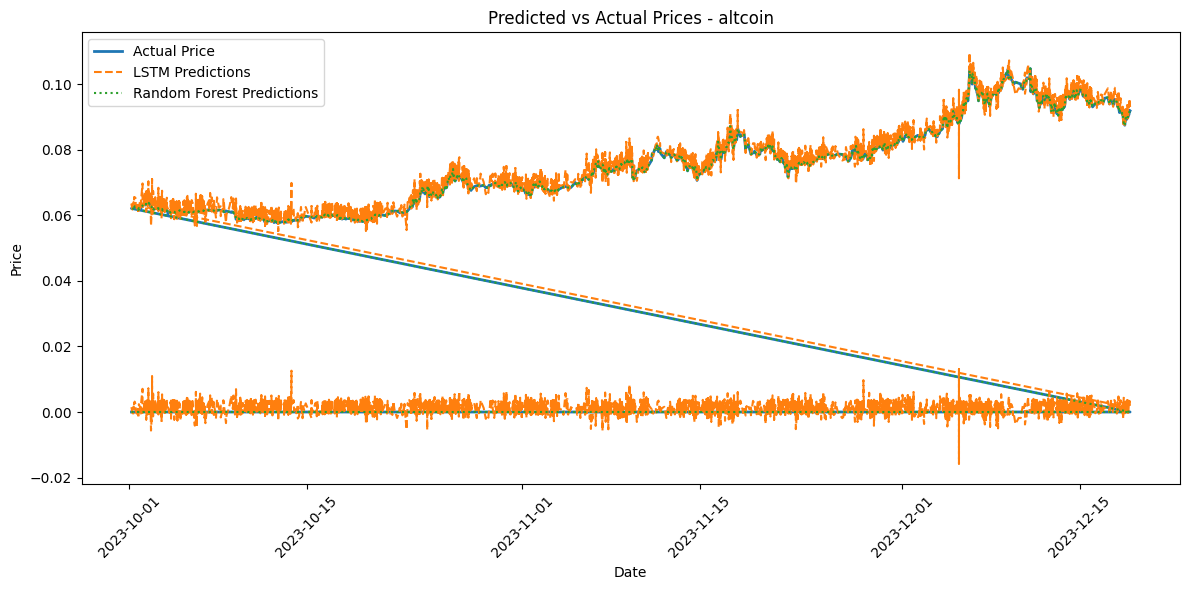

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load the Merged Dataset
merged_data = pd.read_csv("merged_price_news_sentiments.csv")

# Ensure datetime format
merged_data['time'] = pd.to_datetime(merged_data['time'])

# Step 2: Handle Missing Values
# Fill missing sentiment values with neutral defaults
merged_data['sentiment_value'].fillna(0, inplace=True)
merged_data['sentiment_score'].fillna(0.5, inplace=True)

# Step 3: Feature Engineering
# Create lagged features for sentiment values
for lag in range(1, 4):  # Create 1, 2, 3-hour lags
    merged_data[f'sentiment_value_lag{lag}'] = merged_data['sentiment_value'].shift(lag)
    merged_data[f'sentiment_score_lag{lag}'] = merged_data['sentiment_score'].shift(lag)

# Calculate moving averages for sentiment values
merged_data['sentiment_value_ma3'] = merged_data['sentiment_value'].rolling(window=3).mean()
merged_data['sentiment_score_ma3'] = merged_data['sentiment_score'].rolling(window=3).mean()

# Drop rows with NaN values created by lagging
merged_data.dropna(inplace=True)

# Step 4: Split Data
# Training: 2021-10-12 to 2022-12-31
# Validation: 2023-01-01 to 2023-09-30
# Testing: 2023-10-01 to 2023-12-19
train_data = merged_data[merged_data['time'] < '2023-01-01']
val_data = merged_data[(merged_data['time'] >= '2023-01-01') & (merged_data['time'] < '2023-10-01')]
test_data = merged_data[merged_data['time'] >= '2023-10-01']

# Step 5: Define Features and Target
feature_columns = ['price_usd', 'sentiment_value', 'sentiment_score',
                   'sentiment_value_lag1', 'sentiment_value_lag2', 'sentiment_value_lag3',
                   'sentiment_score_lag1', 'sentiment_score_lag2', 'sentiment_score_lag3',
                   'sentiment_value_ma3', 'sentiment_score_ma3']
target_column = 'price_usd'

# Step 6: Scale Features
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_data[feature_columns])
val_features = scaler.transform(val_data[feature_columns])
test_features = scaler.transform(test_data[feature_columns])

train_target = train_data[target_column].values
val_target = val_data[target_column].values
test_target = test_data[target_column].values

# Step 7: Reshape for LSTM Input
train_features_lstm = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
val_features_lstm = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
test_features_lstm = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])

# Step 8: Train LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(feature_columns))),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model.fit(
    train_features_lstm, train_target,
    validation_data=(val_features_lstm, val_target),
    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1
)

# Predict with LSTM
lstm_predictions = lstm_model.predict(test_features_lstm).flatten()

# Step 9: Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_target)

# Predict with Random Forest
rf_predictions = rf_model.predict(test_features)

# Step 10: Evaluate Model Performance
lstm_rmse = np.sqrt(mean_squared_error(test_target, lstm_predictions))
rf_rmse = np.sqrt(mean_squared_error(test_target, rf_predictions))
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")

# Step 11: Visualization for Each Category
# Step 11: Visualization for Each Category
categories = test_data['category'].unique()

for category in categories:
    print(f"Processing category: {category}")

    # Filter data for this category
    test_category = test_data[test_data['category'] == category]

    # Get feature and target indices for this category
    category_indices = test_data['category'] == category
    test_features_category = test_features[category_indices]
    test_target_category = test_target[category_indices]

    # Predict for the category
    lstm_predictions_category = lstm_model.predict(
        test_features_category.reshape(test_features_category.shape[0], 1, test_features_category.shape[1])
    ).flatten()
    rf_predictions_category = rf_model.predict(test_features_category)

    # Evaluate RMSE for this category
    lstm_rmse_category = np.sqrt(mean_squared_error(test_target_category, lstm_predictions_category))
    rf_rmse_category = np.sqrt(mean_squared_error(test_target_category, rf_predictions_category))
    print(f"{category} - LSTM RMSE: {lstm_rmse_category}, Random Forest RMSE: {rf_rmse_category}")

    # Plot Results
    plt.figure(figsize=(12, 6))
    plt.plot(test_category['time'], test_target_category, label='Actual Price', linewidth=2)
    plt.plot(test_category['time'], lstm_predictions_category, label='LSTM Predictions', linestyle='dashed')
    plt.plot(test_category['time'], rf_predictions_category, label='Random Forest Predictions', linestyle='dotted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs Actual Prices - {category}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



# Add RAG

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sentence_transformers import SentenceTransformer
from tqdm import tqdm  # For progress tracking

# Load the merged dataset
print("Loading data...")
merged_data = pd.read_csv("merged_price_news_data.csv")

# Ensure proper datetime format
merged_data['time'] = pd.to_datetime(merged_data['time'])
merged_data['text'] = merged_data['text'].fillna("")

# Initialize a SentenceTransformer model
print("Generating embeddings for news data...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Batch processing for embedding generation
print("Generating embeddings in batch...")
texts = merged_data['text'].tolist()
embeddings = model.encode(texts, batch_size=64)  # Adjust batch size based on memory
merged_data['embeddings'] = list(embeddings)

# Define a function to retrieve relevant news within a time window
def retrieve_relevant_news(news_data, query_embedding, query_time, top_k=5, time_window=1):
    # Filter news within the time window (±1 day by default)
    relevant_news = news_data[
        (news_data['time'] >= query_time - pd.Timedelta(days=time_window)) &
        (news_data['time'] <= query_time + pd.Timedelta(days=time_window))
    ]
    if relevant_news.empty:
        return pd.DataFrame()  # No news found in the time window

    # Compute cosine similarity with filtered news embeddings
    embeddings = np.vstack(relevant_news['embeddings'].tolist())
    similarities = cosine_similarity([query_embedding], embeddings)
    top_indices = np.argsort(similarities[0])[-top_k:]
    return relevant_news.iloc[top_indices]

# Add retrieved sentiment features using batch processing
def add_retrieved_sentiments_batch(data, news_data, model, top_k=5, time_window=1):
    avg_sentiments = []
    for _, row in tqdm(data.iterrows(), total=data.shape[0], desc="Processing Sentiments"):
        query_embedding = row['embeddings']
        query_time = row['time']
        relevant_news = retrieve_relevant_news(news_data, query_embedding, query_time, top_k, time_window)
        avg_sentiments.append(relevant_news['sentiment_polarity'].mean() if not relevant_news.empty else 0)
    data['retrieved_avg_sentiment'] = avg_sentiments
    return data

print("Adding retrieved sentiment features (Batch Processing)...")
merged_data = add_retrieved_sentiments_batch(merged_data, merged_data, model)

# Feature Engineering
print("Performing feature engineering...")
for lag in range(1, 4):
    merged_data[f'price_usd_lag{lag}'] = merged_data['price_usd'].shift(lag)
    merged_data[f'retrieved_avg_sentiment_lag{lag}'] = merged_data['retrieved_avg_sentiment'].shift(lag)

merged_data.dropna(inplace=True)

# Split the dataset
print("Splitting the dataset...")
train_data = merged_data[merged_data['time'] < '2023-01-01']
val_data = merged_data[(merged_data['time'] >= '2023-01-01') & (merged_data['time'] < '2023-10-01')]
test_data = merged_data[merged_data['time'] >= '2023-10-01']

# Define features and target
feature_columns = [
    'price_usd', 'retrieved_avg_sentiment',
    'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3',
    'retrieved_avg_sentiment_lag1', 'retrieved_avg_sentiment_lag2', 'retrieved_avg_sentiment_lag3'
]
target_column = 'price_usd'

# Scale features
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_data[feature_columns])
val_features = scaler.transform(val_data[feature_columns])
test_features = scaler.transform(test_data[feature_columns])

train_target = train_data[target_column].values
val_target = val_data[target_column].values
test_target = test_data[target_column].values

# Reshape for LSTM
train_features_lstm = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
val_features_lstm = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
test_features_lstm = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])

# Train LSTM Model
print("Training LSTM model...")
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(feature_columns))),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model.fit(
    train_features_lstm, train_target,
    validation_data=(val_features_lstm, val_target),
    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1
)

lstm_predictions = lstm_model.predict(test_features_lstm).flatten()

# Train Random Forest Model
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_target)
rf_predictions = rf_model.predict(test_features)

# Evaluate models
print("Evaluating models...")
lstm_rmse = np.sqrt(mean_squared_error(test_target, lstm_predictions))
rf_rmse = np.sqrt(mean_squared_error(test_target, rf_predictions))
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")

# Visualization
print("Visualizing predictions...")
categories = test_data['category'].unique()
for category in categories:
    test_category = test_data[test_data['category'] == category]
    category_indices = test_data['category'] == category
    test_features_category = test_features[category_indices]
    test_target_category = test_target[category_indices]
    lstm_predictions_category = lstm_model.predict(
        test_features_category.reshape(test_features_category.shape[0], 1, test_features_category.shape[1])
    ).flatten()
    rf_predictions_category = rf_model.predict(test_features_category)

    plt.figure(figsize=(12, 6))
    plt.plot(test_category['time'], test_target_category, label='Actual Price', linewidth=2)
    plt.plot(test_category['time'], lstm_predictions_category, label='LSTM Predictions', linestyle='dashed')
    plt.plot(test_category['time'], rf_predictions_category, label='Random Forest Predictions', linestyle='dotted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs Actual Prices - {category}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# OUTPUT saved from Colab
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
Loading data...
Generating embeddings for news data...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
modules.json: 100%
 349/349 [00:00<00:00, 20.5kB/s]
config_sentence_transformers.json: 100%
 116/116 [00:00<00:00, 9.30kB/s]
README.md: 100%
 10.7k/10.7k [00:00<00:00, 760kB/s]
sentence_bert_config.json: 100%
 53.0/53.0 [00:00<00:00, 3.64kB/s]
config.json: 100%
 612/612 [00:00<00:00, 49.3kB/s]
model.safetensors: 100%
 90.9M/90.9M [00:00<00:00, 198MB/s]
tokenizer_config.json: 100%
 350/350 [00:00<00:00, 24.1kB/s]
vocab.txt: 100%
 232k/232k [00:00<00:00, 472kB/s]
tokenizer.json: 100%
 466k/466k [00:00<00:00, 656kB/s]
special_tokens_map.json: 100%
 112/112 [00:00<00:00, 6.22kB/s]
1_Pooling/config.json: 100%
 190/190 [00:00<00:00, 6.50kB/s]
Generating embeddings in batch...
Adding retrieved sentiment features (Batch Processing)...
Processing Sentiments: 100%|██████████| 232229/232229 [40:24<00:00, 95.78it/s]
Performing feature engineering...
Splitting the dataset...
Training LSTM model...
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
Epoch 1/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1138.1500 - val_loss: 0.2258
Epoch 2/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 3.8775 - val_loss: 0.0440
Epoch 3/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.6367 - val_loss: 0.0413
Epoch 4/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.2446 - val_loss: 0.0254
Epoch 5/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1741 - val_loss: 0.0167
Epoch 6/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1514 - val_loss: 0.0224
Epoch 7/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1529 - val_loss: 0.0059
Epoch 8/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1427 - val_loss: 0.0050
Epoch 9/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1470 - val_loss: 0.0032
Epoch 10/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1363 - val_loss: 0.0029
Epoch 11/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1246 - val_loss: 0.0119
Epoch 12/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.1325 - val_loss: 0.0015
Epoch 13/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1235 - val_loss: 0.0113
Epoch 14/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1356 - val_loss: 0.0038
Epoch 15/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1320 - val_loss: 0.0032
Epoch 16/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1247 - val_loss: 0.0024
Epoch 17/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1214 - val_loss: 6.6857e-04
Epoch 18/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.1095 - val_loss: 0.0069
Epoch 19/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1073 - val_loss: 0.0013
Epoch 20/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1100 - val_loss: 1.9723e-04
Epoch 21/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1047 - val_loss: 0.0038
Epoch 22/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1050 - val_loss: 0.0067
Epoch 23/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1148 - val_loss: 0.0083
Epoch 24/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0913 - val_loss: 0.0110
Epoch 25/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1012 - val_loss: 0.0055
Epoch 26/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0928 - val_loss: 0.0202
Epoch 27/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0843 - val_loss: 0.0031
Epoch 28/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0873 - val_loss: 6.8982e-04
Epoch 29/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0973 - val_loss: 0.0085
Epoch 30/50
2309/2309 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.0820 - val_loss: 0.0012
663/663 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Training Random Forest model...
Evaluating models...
LSTM RMSE: 0.014476250817183877
Random Forest RMSE: 0.0010800126664509179
Visualizing predictions...
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
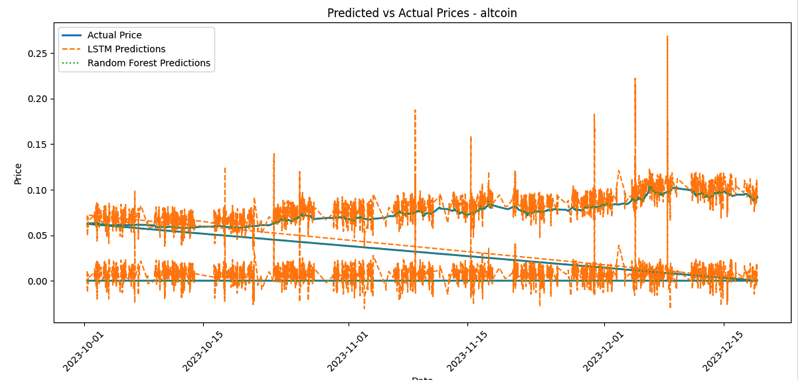
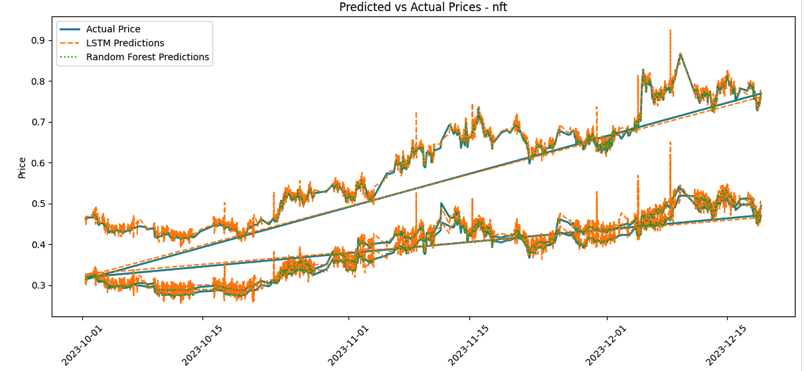
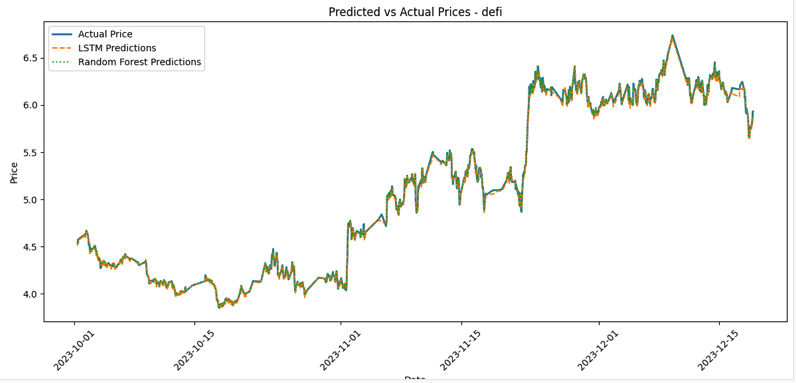

In [3]:
%pip install matplotlib pandas numpy sklearn keras sentence-transformers tqdm


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sentence_transformers import SentenceTransformer
from tqdm import tqdm  # For progress tracking

# Load the merged dataset
print("Loading data...")
merged_data = pd.read_csv("merged_price_news_data.csv")
merged_data['time'] = pd.to_datetime(merged_data['time'])
merged_data['text'] = merged_data['text'].fillna("")

# Initialize a SentenceTransformer model
print("Generating embeddings for news data...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Batch embedding generation
print("Generating embeddings in batch...")
texts = merged_data['text'].tolist()
embeddings = model.encode(texts, batch_size=64)  # Adjust batch size based on memory
merged_data['embeddings'] = list(embeddings)

# Define a function to retrieve relevant news within a time window
def retrieve_relevant_news(news_data, query_time, top_k=5, time_window=1):
    relevant_news = news_data[
        (news_data['time'] >= query_time - pd.Timedelta(days=time_window)) &
        (news_data['time'] <= query_time + pd.Timedelta(days=time_window))
    ]
    if relevant_news.empty:
        return pd.DataFrame()
    news_embeddings = np.vstack(relevant_news['embeddings'].tolist())
    query_embedding = np.mean(news_embeddings, axis=0)
    similarities = cosine_similarity([query_embedding], news_embeddings)
    top_indices = np.argsort(similarities[0])[-top_k:]
    return relevant_news.iloc[top_indices]

# Add retrieved sentiment features using batch processing
def add_retrieved_sentiments_batch(data, news_data, top_k=5, time_window=1):
    avg_sentiments = []
    for _, row in tqdm(data.iterrows(), total=data.shape[0], desc="Processing Sentiments"):
        query_time = row['time']
        relevant_news = retrieve_relevant_news(news_data, query_time, top_k, time_window)
        avg_sentiments.append(relevant_news['sentiment_polarity'].mean() if not relevant_news.empty else 0)
    data['retrieved_avg_sentiment'] = avg_sentiments
    return data

print("Adding retrieved sentiment features...")
merged_data = add_retrieved_sentiments_batch(merged_data, merged_data)

# Feature Engineering
print("Performing feature engineering...")
for lag in range(1, 4):
    merged_data[f'price_usd_lag{lag}'] = merged_data['price_usd'].shift(lag)
    merged_data[f'retrieved_avg_sentiment_lag{lag}'] = merged_data['retrieved_avg_sentiment'].shift(lag)

merged_data.dropna(inplace=True)

# Split the dataset
print("Splitting the dataset...")
train_data = merged_data[merged_data['time'] < '2023-01-01']
val_data = merged_data[(merged_data['time'] >= '2023-01-01') & (merged_data['time'] < '2023-10-01')]
test_data = merged_data[merged_data['time'] >= '2023-10-01']

# Define features and target
feature_columns = [
    'price_usd', 'retrieved_avg_sentiment',
    'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3',
    'retrieved_avg_sentiment_lag1', 'retrieved_avg_sentiment_lag2', 'retrieved_avg_sentiment_lag3'
]
target_column = 'price_usd'

# Scale features
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_data[feature_columns])
val_features = scaler.transform(val_data[feature_columns])
test_features = scaler.transform(test_data[feature_columns])

train_target = train_data[target_column].values
val_target = val_data[target_column].values
test_target = test_data[target_column].values

# Reshape for LSTM
train_features_lstm = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
val_features_lstm = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
test_features_lstm = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])

# Train LSTM Model
print("Training LSTM model...")
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(feature_columns))),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model.fit(
    train_features_lstm, train_target,
    validation_data=(val_features_lstm, val_target),
    epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1
)

lstm_predictions = lstm_model.predict(test_features_lstm).flatten()



In [1]:
# Train Random Forest Model
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_target)
rf_predictions = rf_model.predict(test_features)

# Evaluate models
print("Evaluating models...")
lstm_rmse = np.sqrt(mean_squared_error(test_target, lstm_predictions))
rf_rmse = np.sqrt(mean_squared_error(test_target, rf_predictions))
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")

Training Random Forest model...


NameError: name 'RandomForestRegressor' is not defined

In [12]:
# Visualization without widgets
print("Visualizing predictions...")
category = input("Enter category to visualize: ")
test_category = test_data[test_data['category'] == category]

if test_category.empty:
    print(f"No data found for category: {category}")
else:
    category_indices = test_data['category'] == category
    test_features_category = test_features[category_indices]
    test_target_category = test_target[category_indices]

    lstm_predictions_category = lstm_model.predict(
        test_features_category.reshape(test_features_category.shape[0], 1, test_features_category.shape[1])
    ).flatten()
    rf_predictions_category = rf_model.predict(test_features_category)

    plt.figure(figsize=(12, 6))
    plt.plot(test_category['time'], test_target_category, label='Actual Price', linewidth=2)
    plt.plot(test_category['time'], lstm_predictions_category, label='LSTM Predictions', linestyle='dashed')
    plt.plot(test_category['time'], rf_predictions_category, label='Random Forest Predictions', linestyle='dotted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs Actual Prices - {category}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Visualizing predictions...


## For Live Demonstration

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm  # For progress tracking
from ipywidgets import widgets
from IPython.display import display, clear_output

# Load the merged dataset
print("Loading data...")
merged_data = pd.read_csv("merged_price_news_data.csv")
merged_data['time'] = pd.to_datetime(merged_data['time'])
merged_data['text'] = merged_data['text'].fillna("")

# Initialize SentenceTransformer
print("Generating embeddings for news data...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Batch embedding generation
print("Generating embeddings in batch...")
texts = merged_data['text'].tolist()
embeddings = model.encode(texts, batch_size=64)  # Adjust batch size based on memory
merged_data['embeddings'] = list(embeddings)

# Define function for retrieving relevant news
def retrieve_relevant_news(news_data, query_embedding, top_k=5):
    news_embeddings = np.vstack(news_data['embeddings'].tolist())
    similarities = cosine_similarity([query_embedding], news_embeddings)
    top_indices = np.argsort(similarities[0])[-top_k:]
    return news_data.iloc[top_indices]

# Add retrieved sentiments with batch processing
def add_retrieved_sentiments_batch(data, news_data, model, top_k=5):
    avg_sentiments = []
    for _, row in tqdm(data.iterrows(), total=data.shape[0], desc="Processing Sentiments"):
        query_embedding = row['embeddings']
        relevant_news = retrieve_relevant_news(news_data, query_embedding, top_k)
        avg_sentiments.append(relevant_news['sentiment_polarity'].mean() if not relevant_news.empty else 0)
    data['retrieved_avg_sentiment'] = avg_sentiments
    return data

print("Adding retrieved sentiment features...")
merged_data = add_retrieved_sentiments_batch(merged_data, merged_data, model)

# Feature Engineering
print("Performing feature engineering...")
for lag in range(1, 4):
    merged_data[f'price_usd_lag{lag}'] = merged_data['price_usd'].shift(lag)
    merged_data[f'retrieved_avg_sentiment_lag{lag}'] = merged_data['retrieved_avg_sentiment'].shift(lag)

merged_data.dropna(inplace=True)

# Split the dataset
train_data = merged_data[merged_data['time'] < '2023-01-01']
val_data = merged_data[(merged_data['time'] >= '2023-01-01') & (merged_data['time'] < '2023-10-01')]
test_data = merged_data[merged_data['time'] >= '2023-10-01']

# Define Features and Target
feature_columns = [
    'price_usd', 'retrieved_avg_sentiment',
    'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3',
    'retrieved_avg_sentiment_lag1', 'retrieved_avg_sentiment_lag2', 'retrieved_avg_sentiment_lag3'
]
target_column = 'price_usd'

# Scale Features
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_data[feature_columns])
val_features = scaler.transform(val_data[feature_columns])
test_features = scaler.transform(test_data[feature_columns])

train_target = train_data[target_column].values
val_target = val_data[target_column].values
test_target = test_data[target_column].values

# Reshape for LSTM
train_features_lstm = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
val_features_lstm = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
test_features_lstm = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])

# Train LSTM Model
print("Training LSTM model...")
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(feature_columns))),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(train_features_lstm, train_target, epochs=20, batch_size=32, verbose=1)

lstm_predictions = lstm_model.predict(test_features_lstm).flatten()

# Train Random Forest Model
print("Training Random Forest model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_features, train_target)
rf_predictions = rf_model.predict(test_features)

# Evaluate models
print("Evaluating models...")
lstm_rmse = np.sqrt(mean_squared_error(test_target, lstm_predictions))
rf_rmse = np.sqrt(mean_squared_error(test_target, rf_predictions))
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")



Loading data...
Generating embeddings for news data...
Generating embeddings in batch...
Adding retrieved sentiment features...


Processing Sentiments: 100%|██████████| 367096/367096 [43:15:53<00:00,  2.36it/s]    


Performing feature engineering...
Training LSTM model...
Epoch 1/20


/Users/aayush015/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3493/3493 ━━━━━━━━━━━━━━━━━━━━ 2s 407us/step - loss: 89698472.0000
Epoch 2/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - loss: 75841592.0000
Epoch 3/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - loss: 55793484.0000
Epoch 4/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - loss: 32441320.0000
Epoch 5/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - loss: 15154435.0000
Epoch 6/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - loss: 5236713.0000
Epoch 7/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - loss: 910063.2500
Epoch 8/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - loss: 93322.0469
Epoch 9/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - loss: 22877.3594
Epoch 10/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - loss: 13052.3828
Epoch 11/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - loss: 8909.0420
Epoch 12/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - loss: 3592.2627
Epoch 13/20
3493/3493 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - loss: 4379.5410
Epoch 14/20
3493/

Text(value='What news stories affected the DeFi coin prices the most in March 2023? ', description='Query:', l…

Text(value='2023-02-01', description='Start Date:', placeholder='YYYY-MM-DD')

Text(value='2023-04-01', description='End Date:', placeholder='YYYY-MM-DD')

Button(description='Submit Query', style=ButtonStyle())

Processing query: What news stories affected the DeFi coin prices the most in March 2023? 

Top Relevant News:
                      time                                               text  \
64729  2023-07-14 21:00:00  2023 has been a mixed year in meme coin market...   
28018  2023-07-14 21:00:00  2023 has been a mixed year in meme coin market...   
284983 2023-07-14 21:00:00  2023 has been a mixed year in meme coin market...   
358403 2023-07-14 21:00:00  2023 has been a mixed year in meme coin market...   
174852 2023-07-14 21:00:00  2023 has been a mixed year in meme coin market...   

        sentiment_polarity  
64729                 0.17  
28018                 0.17  
284983                0.17  
358403                0.17  
174852                0.17  


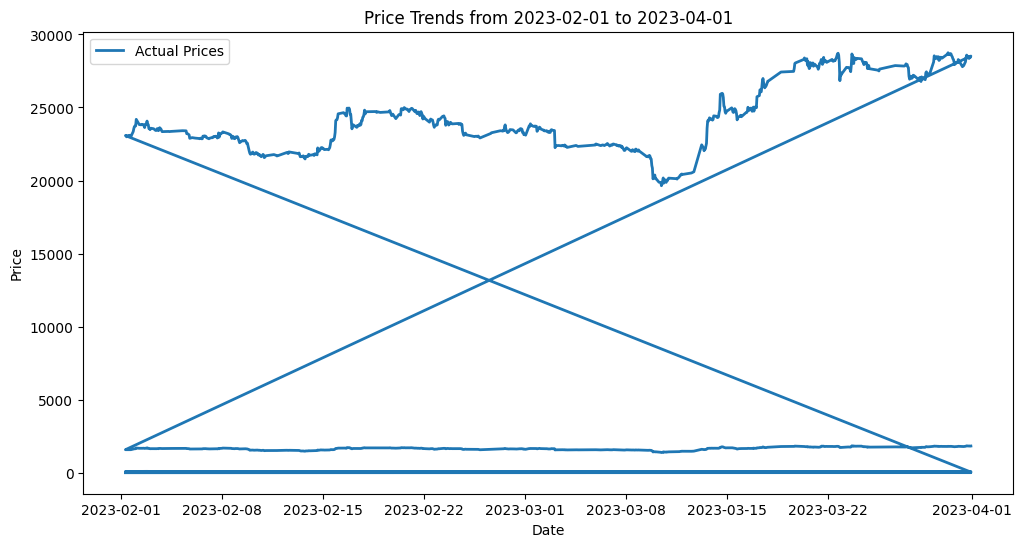

In [ ]:
# Interactive Query System with Widgets
def interactive_query_system():
    query_widget = widgets.Text(
        value='Why did Bitcoin price increase?',
        description='Query:',
        placeholder='Enter your query here',
        layout=widgets.Layout(width='80%')
    )
    start_date_widget = widgets.Text(
        value='2023-01-01',
        description='Start Date:',
        placeholder='YYYY-MM-DD'
    )
    end_date_widget = widgets.Text(
        value='2023-03-01',
        description='End Date:',
        placeholder='YYYY-MM-DD'
    )
    submit_button = widgets.Button(description="Submit Query")

    def on_submit(b):
        query = query_widget.value
        start_date = start_date_widget.value
        end_date = end_date_widget.value
        clear_output(wait=True)
        display(query_widget, start_date_widget, end_date_widget, submit_button)
        print(f"Processing query: {query}")

        # Retrieve relevant news
        query_embedding = model.encode(query)
        relevant_news = retrieve_relevant_news(merged_data, query_embedding, top_k=5)
        print("\nTop Relevant News:")
        print(relevant_news[['time', 'text', 'sentiment_polarity']])

        # Filter data by date and plot
        filtered_data = merged_data[
            (merged_data['time'] >= start_date) & (merged_data['time'] <= end_date)
        ]
        plt.figure(figsize=(12, 6))
        plt.plot(filtered_data['time'], filtered_data['price_usd'], label='Actual Prices', linewidth=2)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title(f'Price Trends from {start_date} to {end_date}')
        plt.legend()
        plt.show()

    submit_button.on_click(on_submit)
    display(query_widget, start_date_widget, end_date_widget, submit_button)

# Launch the interactive query system
interactive_query_system()

# Using LangChain

In [9]:
%pip install faiss-cpu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.2 MB 1.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Loading dataset...
Vectorizing text using TF-IDF...
Loading GPT-2 for generating answers...
Performing feature engineering...
Splitting dataset...
Scaling features...
Training LSTM model...
Epoch 1/20


/Users/aayush015/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 416us/step - loss: 91685328.0000
Epoch 2/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 402us/step - loss: 67339176.0000
Epoch 3/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 402us/step - loss: 32443284.0000
Epoch 4/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 398us/step - loss: 10577491.0000
Epoch 5/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 409us/step - loss: 1866416.0000
Epoch 6/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 402us/step - loss: 249340.7344
Epoch 7/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 407us/step - loss: 49748.8945
Epoch 8/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step - loss: 18711.7422
Epoch 9/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 401us/step - loss: 9865.6455
Epoch 10/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 398us/step - loss: 8686.4414
Epoch 11/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 400us/step - loss: 3250.7456
Epoch 12/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 398us/step - loss: 2916.1665
Epoch 13/20
4537/4537 ━━━━━━━━━━━━━━━━━━━━ 2s 398us/step - loss: 3010.2756
Epoch 14/20
4537/4537 

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


LSTM RMSE: 30.426768112872853

Processing query...

Generating Answer...

Generated Answer:
Context: A complaint by the US Securities and Exchange Commission filed against Binance and its CEO Changpeng Zhao unveiled a mix of stark revelations about the world's largest crypto exchange from evading US laws to internal conversations about Binance.US. From NFTs to the metaverse, decentralization is making its way across the creator economy. With the rise of Web3, what lies ahead for creators in 2022? After several months of declining revenues, Ethereum miners turned the tabled with over $1 billion in March.\r\n Majority of the top-100 DeFi tokens broke out of three week long bearish phase and registered double digit gains over the past week. Bitcoin price is facing hurdles above USD 21,650.\nEthereum declined below USD 1,650, XRP gained pace for a move above USD 0.35.

Question: Why did Bitcoin price rise?

Answer: Because it's more volatile than USD 2,000, and Bitcoin continues to surge, 

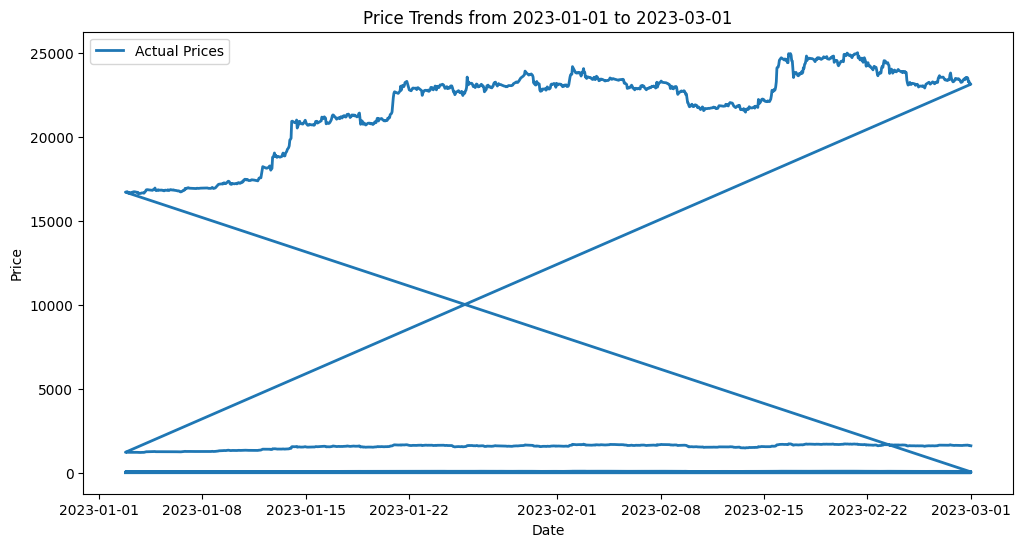

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch

# Load Dataset
print("Loading dataset...")
merged_data = pd.read_csv("merged_price_news_data.csv")
merged_data['time'] = pd.to_datetime(merged_data['time'])
merged_data['text'] = merged_data['text'].fillna("")

# Vectorize Text Using TF-IDF
print("Vectorizing text using TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit features for efficiency
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_data['text'])

# Define Function to Retrieve Relevant News
def retrieve_relevant_news(query, tfidf_matrix, tfidf_vectorizer, top_k=5):
    query_vec = tfidf_vectorizer.transform([query])  # Vectorize the query
    similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()  # Calculate cosine similarity

    # Ensure indices are valid
    top_indices = np.argsort(similarities)[-top_k:]
    top_indices = top_indices[top_indices < len(merged_data)]  # Filter out-of-bounds indices

    if len(top_indices) == 0:
        return pd.DataFrame(columns=merged_data.columns)  # Return an empty DataFrame if no matches

    return merged_data.iloc[top_indices]

# Load GPT-2 for Generating Answers
print("Loading GPT-2 for generating answers...")
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
generator_model = GPT2LMHeadModel.from_pretrained(model_name).to(
    torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Define Function to Generate Answer
def generate_answer(query, relevant_news):
    if relevant_news.empty:
        return "No relevant information found."

    context = " ".join(relevant_news['text'].tolist())
    prompt = f"Context: {context}\n\nQuestion: {query}\n\nAnswer:"

    # Tokenize the prompt
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        max_length=512,  # Ensure truncation is handled
        truncation=True,
        padding=True
    ).to(generator_model.device)

    # Generate output
    outputs = generator_model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=150,  # Limit new token generation
        temperature=0.7,
        do_sample=True
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Feature Engineering
print("Performing feature engineering...")
merged_data['retrieved_avg_sentiment'] = merged_data['text'].apply(
    lambda x: np.random.uniform(-1, 1)  # Placeholder for sentiment analysis
)

for lag in [1, 2, 3]:
    merged_data[f'price_usd_lag{lag}'] = merged_data['price_usd'].shift(lag)
    merged_data[f'retrieved_avg_sentiment_lag{lag}'] = merged_data['retrieved_avg_sentiment'].shift(lag)

merged_data.dropna(inplace=True)

# Splitting Data for Prediction
print("Splitting dataset...")
train_data = merged_data[merged_data['time'] < '2023-01-01']
val_data = merged_data[(merged_data['time'] >= '2023-01-01') & (merged_data['time'] < '2023-10-01')]
test_data = merged_data[merged_data['time'] >= '2023-10-01']

feature_columns = [
    'price_usd', 'retrieved_avg_sentiment',
    'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3',
    'retrieved_avg_sentiment_lag1', 'retrieved_avg_sentiment_lag2', 'retrieved_avg_sentiment_lag3'
]
target_column = 'price_usd'

# Scale Features
print("Scaling features...")
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_data[feature_columns])
val_features = scaler.transform(val_data[feature_columns])
test_features = scaler.transform(test_data[feature_columns])

train_target = train_data[target_column].values
val_target = val_data[target_column].values
test_target = test_data[target_column].values

# Reshape Features for LSTM
train_features_lstm = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
val_features_lstm = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
test_features_lstm = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])

# Train LSTM Model
print("Training LSTM model...")
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, len(feature_columns))),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(
    train_features_lstm, train_target,
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate LSTM Model
print("Evaluating LSTM model...")
lstm_predictions = lstm_model.predict(test_features_lstm).flatten()
lstm_rmse = np.sqrt(mean_squared_error(test_target, lstm_predictions))
print(f"LSTM RMSE: {lstm_rmse}")

# Query and Answer
def answer_query_without_embeddings(query, start_date, end_date):
    print("\nProcessing query...")
    relevant_news = retrieve_relevant_news(query, tfidf_matrix, tfidf_vectorizer, top_k=5)

    print("\nGenerating Answer...")
    answer = generate_answer(query, relevant_news)
    print("\nGenerated Answer:")
    print(answer)

    filtered_data = merged_data[(merged_data['time'] >= start_date) & (merged_data['time'] <= end_date)]
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['time'], filtered_data['price_usd'], label='Actual Prices', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Trends from {start_date} to {end_date}')
    plt.legend()
    plt.show()

# Example Usage
answer_query_without_embeddings("Why did Bitcoin price rise?", "2023-01-01", "2023-03-01")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Processing query...

Generating Answer...

Generated Answer:
Context: Binance has announced that it is temporarily suspending US dollar withdrawals and deposits for international customers beginning February 8. Get your daily, bite-sized digest of cryptoasset and blockchain-related news. Offering two separate Ethereum ETPs after the hard fork would allow ETC Group to ensure the most transparent and fair approach, the founder said. 'If you're serious about security, @QubesOS is the best OS available today,' commented Edward Snowden in a previous tweet.

Question: What was the impact of FTX collapse on Bitcoin prices?

Answer: Bitcoin price is down 2.8% in the last two months, but the price has recovered over the past year. The price has also recovered over the past year, and the price has also recovered over the past year.
Bitcoin is the only blockchain-related block of value that can be mined on a single block, and that can only be mined on a single block. The value of the block has a

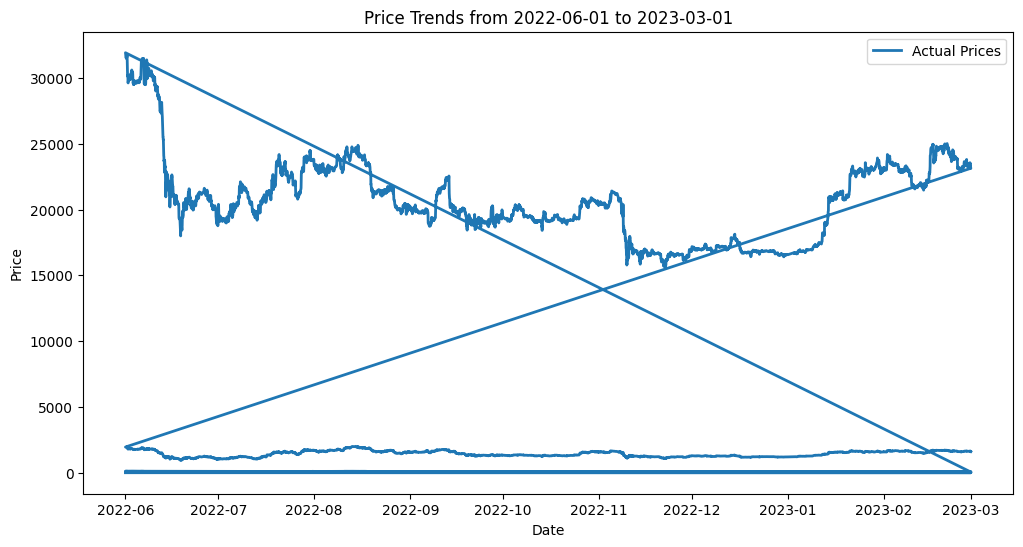

In [3]:
answer_query_without_embeddings("What was the impact of FTX collapse on Bitcoin prices?", "2022-06-01", "2023-03-01")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Processing query...

Generating Answer...

Generated Answer:
Context: LINK is the only crypto asset in the top 20 that is currently flashing green. Despite bitcoin's wobbly performance in 2022, the percentage has been progressively rising since then. Hayden Adams said that JPMorgan Chase closed his banking accounts with 'no notice or explanation.' \x9cEmployees\x9d at Brazilian company at center of crypto scam allegations have been filmed apparently on their way to remove evidence \x93 under the cover of night.

Question: What caused the volatility in Dogecoin prices in 2023? 

Answer: "Because the price was too high. The price was the same as previous years. The price was higher. It was the same price as previous years. The price was higher. It was the same price as previous years. The price was higher."
Question: What caused the volatility in Dogecoin prices in 2023? 
Answer: "Because the price was too high. The price was higher. It was the same price as previous years. The price wa

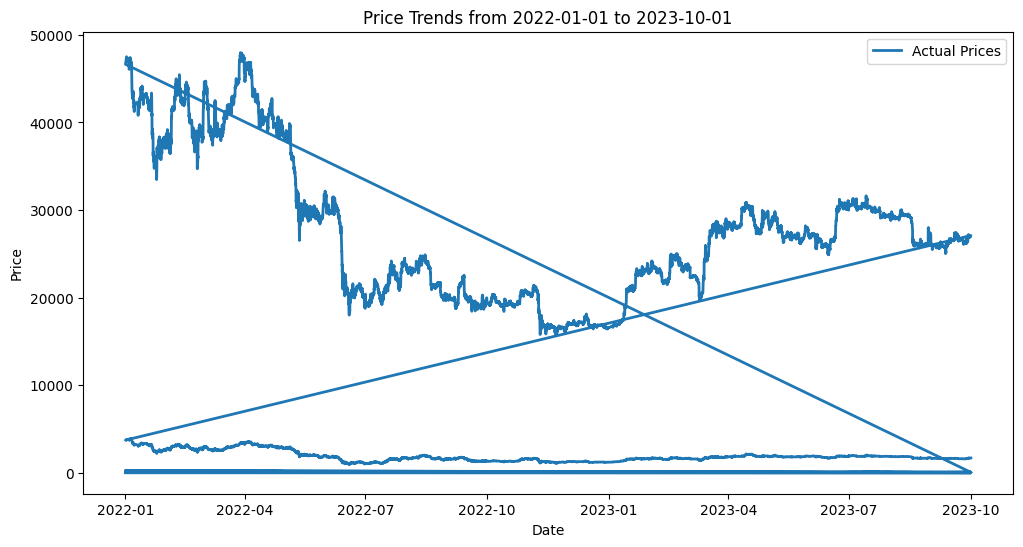

In [4]:
answer_query_without_embeddings("What caused the volatility in Dogecoin prices in 2023? ", "2022-01-01", "2023-10-01")

# Example Queries: 

What was the impact of FTX collapse on Bitcoin prices? <br>
What caused the volatility in Dogecoin prices in 2023? <br>
How did Federal Reserve rate hikes impact Bitcoin prices? <br>
What caused a spike in cryptocurrency prices after Elon Musk's tweet? <br>
What drove the meme coin rally in April 2023? <br>
What happened the last time Bitcoin reached $60,000? <br>